In [1]:
# Step 1. Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 2. Reading the data

df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Step 3. Selecting perticular columns

cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


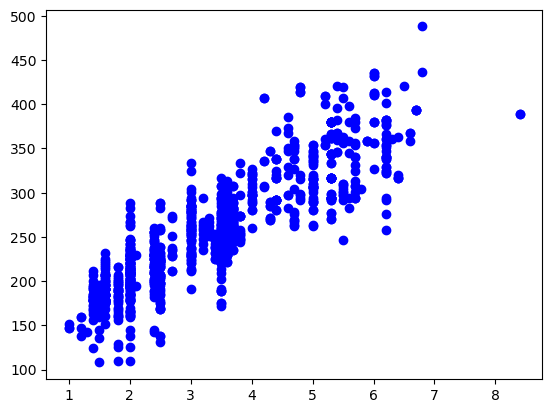

In [4]:
# Info - plotting Graph

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS , color = 'blue')

In [5]:
# Step 4. Splitting Data

msk = np.random.rand(len(cdf)) < 0.80

train = cdf[msk]
test = cdf[~msk]

In [6]:
train.shape

(838, 4)

In [7]:
test.shape

(229, 4)

In [8]:
# Step 5. Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Converting into array
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [9]:
# Info - Just train_x
train_x[0:5]

array([[2. ],
       [1.5],
       [3.5],
       [3.5],
       [3.5]])

In [10]:
# Step 6. Polinomial Features
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

In [11]:
# Info - After Polynomial Features train_x
train_x_poly[0:5]

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25]])

In [12]:
# Step 7.Linear Regression Function

clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)

In [13]:
train_y

LinearRegression()

In [14]:
clf

LinearRegression()

In [15]:
# Step 8. The Coefficient and Intercept

print('Coefficient: ',clf.coef_)
print('Intercept: ',clf.intercept_)

Coefficient:  [[ 0.         49.41241775 -1.36060097]]
Intercept:  [108.88158571]


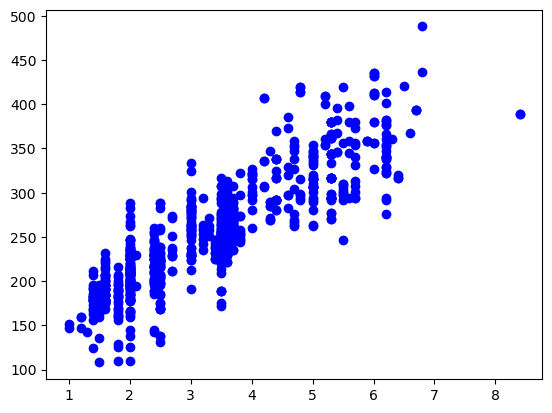

In [16]:
# Info - graph without curve line

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')

In [17]:
# Info - For The Curve Line in Graph 

xx = np.arange(0.1,10,.1)  # arange function give any combination of range

Text(0, 0.5, 'Co2 Emission')

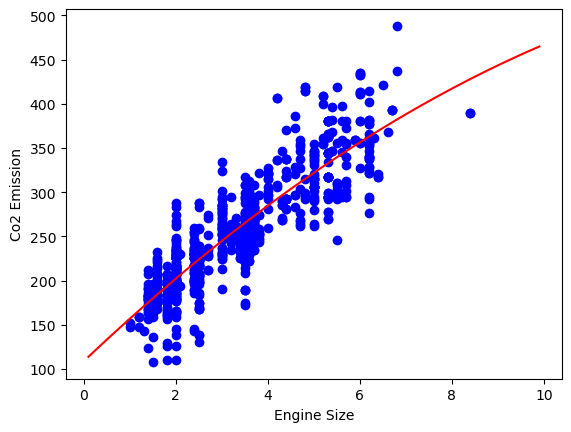

In [18]:
# Info - graph with curve

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS , color ='blue')

# y = b + m1xx + m2xx**2     formula

yy = clf.intercept_[0] + clf.coef_[0][1]*xx + clf.coef_[0][2]*np.power(xx,2)

plt.plot(xx , yy , 'r')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")

In [19]:
# step 9. Evaluation

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)  # testing

In [20]:
# Info - before Transforming

test_x[0:5]

array([[2.4],
       [3.5],
       [4.7],
       [4.7],
       [2. ]])

In [21]:
# Info - after transforming

test_x_poly[0:5]

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  4.7 , 22.09],
       [ 1.  ,  4.7 , 22.09],
       [ 1.  ,  2.  ,  4.  ]])

In [22]:
# prediction
pred = clf.predict(test_x_poly)

print(f"Mean Absolute Error: {np.mean(np.absolute(pred - test_y))}")
print(f"Residual sum of squares(MSE): {np.mean((pred - test_y) ** 2)}")
print(f"R2-score: {r2_score(pred , test_y)}")

Mean Absolute Error: 21.805306751174076
Residual sum of squares(MSE): 790.6143147107344
R2-score: 0.7166534597246372


In [23]:
# step 10. New predictions get value of engine size tranform it and then predict

trans_data = poly.fit_transform([[3.25]])

In [24]:
trans_data

array([[ 1.    ,  3.25  , 10.5625]])

In [25]:
clf.predict(trans_data)

array([[255.10059567]])